Pre-class Work

A- Write the worst sort function in the world. This function takes a list, and then randomly shuffles it until it happens to be in sorted order. Once it is in sorted order then the list is returned.
1. Write the necessary python code to do this. Your code should be properly commented on and you should show a couple of tests that validate your implementation.
2. What is the best case complexity of this algorithm?
3. What is the average case complexity of your implementation?
4. For what size lists is this a feasible method?
5. (Optional) Can you think of an even worse sorting method? In such a case, what would its complexity be? How big a list could you sort?

In [3]:
import numpy as np
import random
import math
import time

def worst_sort(a):
    sort = False
    
    #until list is sorted
    while sort == False:
        
        #Shuffle list randomly
        a = random.sample(a, len(a))
        
        #Is every item is smaller than the subsequent one
        sort = all(a[i] <= a[i+1] for i in range(len(a)-1))
        
    return a

In [12]:
#Check it works
test1 = [5,2,1,6,4]
test2 = [-2, 12, 23, 0.55, 2]
test3 = [5, 3, 5, 1, 5]

print(worst_sort(test1))
print(worst_sort(test2))
print(worst_sort(test3))


#Question 2
'''
In the best case, the first random shuffle of the array yields a sorted array. This is O(1).
'''

#Question 3
'''
Assume that the array contains no duplicates.
For an array to be sorted, each element must be at a specific position,
where it is larger than the previous but smaller than the following element.
If we have a list of length 3, the probability of the first element being in the right place is 1/3.
If one element is in the right place, the probability of the next one being in the right place is 1/(3-1).
This extends to the n case, the complexity is 1/n + 1/n-1 + 1/n-2 ... 1/1.
That means we can expect the runtime to be n factorial. O(n!)
'''

#Question 4
'''
This is not a hardware course, but given the complexity of the algorithm, it depends on the computational power 
of the computer. However, for any given level of computing power this sorting algorithm will perform worse 
standard sorting algorithms, regardless of n.
'''

#The expected number of random shuffles before a correctly sorted array, as a function of n.
print([math.factorial(n) for n in range(15)])

[1, 2, 4, 5, 6]
[-2, 0.55, 2, 12, 23]
[1, 3, 5, 5, 5]
[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880, 3628800, 39916800, 479001600, 6227020800, 87178291200]


In [ ]:
#Evaluating optimal value for k by comparing run times

import time
import numpy as np
runtime = []
#insertion_time = []

i = 30 #Number of times to run random arrays of size n
ns = [n for n in range(5, 25010, 10)]
for n in ns:
    temp = 0
    #insertion_temp = 0
    for _ in range(i):
        #t=2
        start = time.time()
        worst_sort(
            list(np.random.randint(-100, 100, n)))
        end = time.time()
        temp += (end - start)

    runtime.append(temp/i)
    
    if runtime[-1] > 1:
        print(n)
        break

B- Write an approximate median finder. Given a list and δ (a number between 0 and 0.5), the median finder function returns a number that is guaranteed to lie between the (50-δ/2)% and (50+δ/2)% percentiles. Implement such a function by randomly selecting an element from the list and testing whether or not it lies within the bounds. If it doesn’t then decide whether or not to retry with a new random element. If you decide not to retry, then the procedure fails.
1. Come up with your own policy of how many times to retry. What is your probability of failure? Does it scale with N or δ?
2. Write the necessary python code to do this. Your code should be properly commented on and you should show a couple of tests that validate your implementation.
3. Analyze the time complexity, both theoretically and experimentally.
4. Analyze the space complexity. (Think about using the tools for time complexity on memory).
5. (Optional) Are there any optimizations you can make without changing the space/time complexity?

In [13]:
def approximate_median(a, error):
    #Check if rules are followed
    if error > 0.5 or error < 0:
        return print("Error: error out of bounds")
    
    #Define lower and upper bound for approximation
    lower = np.percentile(a, 50-error/2)
    upper = np.percentile(a, 50+error/2)
    
    #Initialize found bool and interation counter
    found, counter = False, 0
    
    #Until approximate median is found
    while not found:
        
        #Pick a random number
        test = random.choice(a)
        
        #Check if within bounds
        if test >= lower and test <= upper:
            return test
        
        #Increment counter
        counter += 1
        
        #If nunber of tries is exceeded, scales with n.
        if counter > len(a)*50:
            return print("Error: Median not found")

In [28]:
#Check that it works

import statistics

def approximate_median_checker():
    j = 0
    correct = True
    
    #Check up to 50 times
    while j <= 50 and correct:
        
        #On random list of length between 0 and 1000, 
        #with values between -100 and 100
        test_array = list(np.random.randint(
            -100, 100, np.random.randint(0, 1000, 1)))
        
        #Sort using built-in function
        a = statistics.median(test_array)
        
        b = approximate_median(test_array, 0.5)
        
        
        #Check if it found an approximate median
        if type(b) == int:
            
            #If sorted arrays don't match, return False
            if a+0.5/2 >= b and a-0.5/2 <= b:
                correct = False
        
        #increment j    
        j += 1
        
    return correct

approximate_median_checker()

#Question 3
'''
Assuming the acceptable error is small enough that only one element falls inside it,
the probability of randomly selecting that number from an array of n elements is 1/n -> O(n)
I did n*50 tries as the stop condition, to account for moderately bad-luck deviations from best case
'''

Error: Median not found
Error: Median not found
Error: Median not found


True

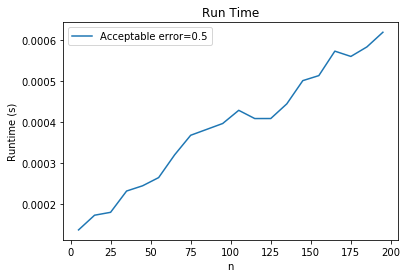

'\nThe plot supports the complexity = 0(n) from theoretical analysis\n'

In [35]:
#Run time

import time
import numpy as np
runtime = []

i = 10000 #Number of times to run random arrays of size n
ns = [n for n in range(5, 200, 10)]
for n in ns:
    temp = 0
    #insertion_temp = 0
    for _ in range(i):
        start = time.time()
        approximate_median(
            list(np.random.randint(-100, 100, n)), 0.5)
        end = time.time()
        temp += (end - start)

    runtime.append(temp/i)
    
#Plot results
import matplotlib.pyplot as plt

plt.plot(ns,runtime, label = "Acceptable error=0.5")

plt.title("Run Time")
plt.xlabel("n")
plt.ylabel("Runtime (s)")
plt.legend(loc=0)
plt.show()


#Question 3 empirical
'''
The plot supports the complexity = 0(n) from theoretical analysis
'''

#Question 4
'''
We store the input array of size n. The lower and upper bound, size 2. And the test, size 1.
The spatial complexity is dominated by the size of the array, n. -> O(n) spatial complexity.
'''

In [ ]:
import matplotlib.pyplot as plt
#ns = [n for n in range(5, 110, 5)]
ns = [n for n in range(5, 10010, 1000)]



In [6]:
import random
random.seed(123) 
def max_retries(N, delta):
    return 1/delta

def approx_median_breakout(lst, delta):
    n = len(lst)
    mx = int(max_retries(n, delta))
    for a in range(mx):
        idx = random.randint(0,n-1)
        guess = lst[idx]
        less = [1 for x in lst if guess < x]
        location = sum(less)
        if ((n*(1-delta)/2 < location) and (location< n*(1+delta)/2)):
            print('location and guess are', location, guess)
            return guess
    raise ValueError("No median found")

approx_median_breakout([0,1], 0.1)


location and guess are 1 0


0